In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler  
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree, DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [3]:
data = pd.read_excel('/Users/malorenaudin/credit_scoring/dataproject2024.xlsx')
data.drop(columns=['ID', 'Group', 'PD','Default (y)'], inplace=True)
continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Loan duration', 'Monthly payment']
scaler = StandardScaler() 
data[continuous_features] = scaler.fit_transform(data[continuous_features])

Training Accuracy: 0.8930013458950202, Testing Accuracy: 0.8882907133243607
Training F1 Score: 0.1358695652173913, Testing F1 Score: 0.13541666666666666
Confusion Matrix (Testing Set):
[[1307    2]
 [ 164   13]]
Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1309
           1       0.87      0.07      0.14       177

    accuracy                           0.89      1486
   macro avg       0.88      0.54      0.54      1486
weighted avg       0.89      0.89      0.84      1486



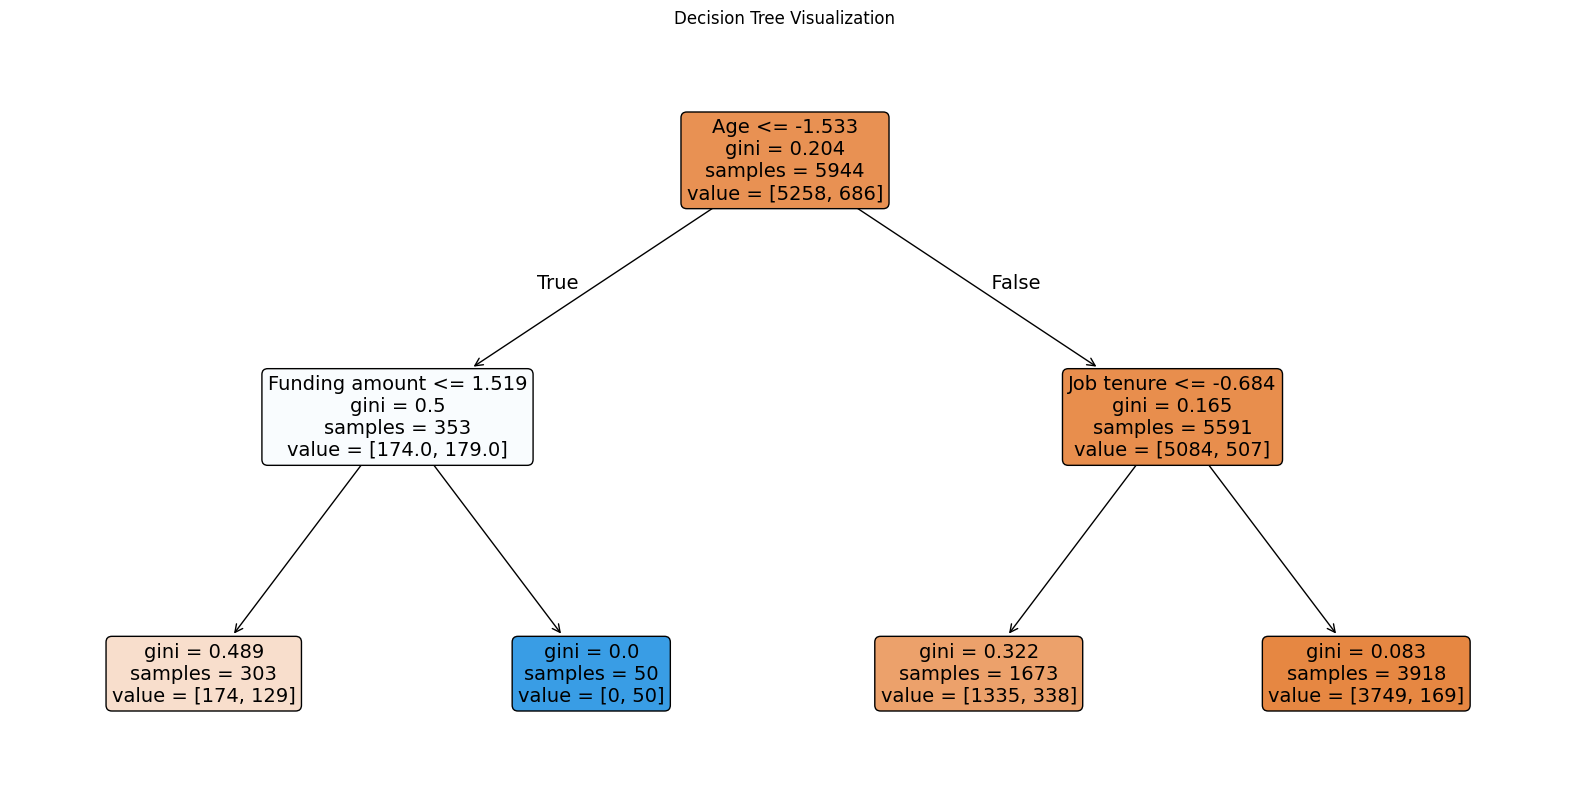

In [6]:

X = data.drop(columns=['Pred_default (y_hat)'])  # Features
y = data['Pred_default (y_hat)']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = DecisionTreeClassifier(max_depth = 2, random_state=42, ccp_alpha=0.001)
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy and F1 score for training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_f1 = f1_score(y_train, train_predictions)
test_f1 = f1_score(y_test, test_predictions)

# Print results
print(f'Training Accuracy: {train_accuracy}, Testing Accuracy: {test_accuracy}')
print(f'Training F1 Score: {train_f1}, Testing F1 Score: {test_f1}')

# Print the confusion matrix
print("Confusion Matrix (Testing Set):")
print(confusion_matrix(y_test, test_predictions))

# Print classification report
print("Classification Report (Testing Set):")
print(classification_report(y_test, test_predictions))

plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=14)
plt.title("Decision Tree Visualization")
plt.show()
